In [1]:
import os
import cv2
import numpy as np
import time
from fitter import Fitter

def getavgstd(image):
    avg = []
    std = []
    image_avg_l = np.mean(image[:, :, 0])
    image_std_l = np.std(image[:, :, 0])
    image_avg_a = np.mean(image[:, :, 1])
    image_std_a = np.std(image[:, :, 1])
    image_avg_b = np.mean(image[:, :, 2])
    image_std_b = np.std(image[:, :, 2])
    avg.append(image_avg_l)
    avg.append(image_avg_a)
    avg.append(image_avg_b)
    std.append(image_std_l)
    std.append(image_std_a)
    std.append(image_std_b)
    return (avg, std)


path_dataset = '/root/autodl-tmp/MoNuSeg2018/standard/test/data'

# path_

labL_avg_List = []
labA_avg_List = []
labB_avg_List = []
labL_std_List = []
labA_std_List = []
labB_std_List = []

t1 = time.time()
for class_dir in os.listdir(path_dataset):
    path_class = os.path.join(path_dataset,class_dir)
    print(path_class)
    for image in os.listdir(path_class):
        path_img = os.path.join(path_class,image)
        img = cv2.imread(path_img)
        # print(img) #None
        try:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
            img_avg, img_std = getavgstd(img)
        except:
            continue
            print(path_img)
        labL_avg_List.append(img_avg[0])
        labA_avg_List.append(img_avg[1])
        labB_avg_List.append(img_avg[2])
        labL_std_List.append(img_std[0])
        labA_std_List.append(img_std[1])
        labB_std_List.append(img_std[2])

t2 = time.time()
print(t2-t1)
#     break

/root/autodl-tmp/MoNuSeg2018/standard/test/data/all
/root/autodl-tmp/MoNuSeg2018/standard/test/data/.ipynb_checkpoints
0.8424479961395264


{'norm': {'loc': 131.0796558516366, 'scale': 19.859453518700672}}

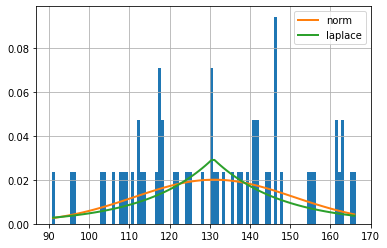

In [2]:
f = Fitter(labL_avg_List, distributions=['norm', 'laplace'])
f.fit()
f.summary()
f.get_best(method='sumsquare_error')

In [3]:
x = f.get_best(method='sumsquare_error').keys()

In [4]:
print(list(x)[0])

norm


{'norm': {'loc': 55.57532521920958, 'scale': 8.406907473918574}}

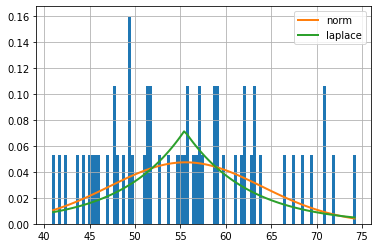

In [5]:
f = Fitter(labL_std_List, distributions=['norm','laplace'])
f.fit()
f.summary()
f.get_best(method='sumsquare_error')

{'laplace': {'loc': 153.92963409423828, 'scale': 3.638587474822998}}

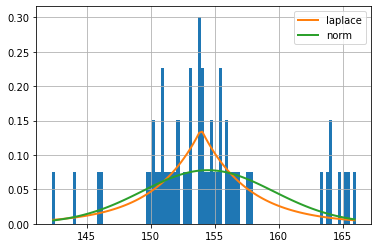

In [6]:
f = Fitter(labA_avg_List, distributions=['norm', 'laplace'])
f.fit()
f.summary()
f.get_best(method='sumsquare_error')

{'norm': {'loc': 10.878154153130083, 'scale': 1.7051535786416896}}

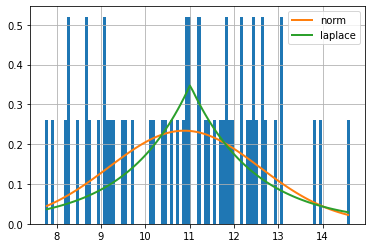

In [7]:
f = Fitter(labA_std_List, distributions=['norm', 'laplace'])
f.fit()
f.summary()
f.get_best(method='sumsquare_error')

{'norm': {'loc': 107.78558043071202, 'scale': 2.1788395761151924}}

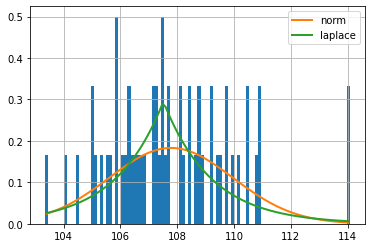

In [8]:
f = Fitter(labB_avg_List, distributions=['norm','laplace'])
f.fit()
f.summary()
f.get_best(method='sumsquare_error')

{'laplace': {'loc': 9.75991696131936, 'scale': 1.1549229110251613}}

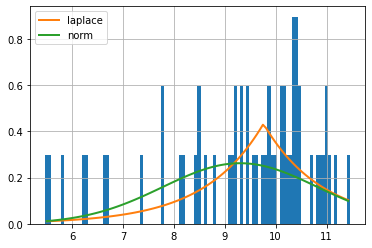

In [9]:
f = Fitter(labB_std_List, distributions=['norm', 'laplace'])
f.fit()
f.summary()
f.get_best(method='sumsquare_error')

In [10]:
import numpy as np
dist = 'norm'
x = (np.random.normal if dist == 'norm' else np.random.laplace)(loc=10, scale=1,
                                                              size=1)
print(x)

[11.10089946]


In [2]:
x = None
print(x != None)


False
